<a href="https://colab.research.google.com/github/Aayush-Keshwani/MFC_AIML/blob/main/MFC_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataframe Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataframe:
   Unnamed: 0       furnishing  bathrooms      facing  security_numeric  \
0           0      Unfurnished          2  North-East          150000.0   
1           1      Unfurnished          1       South          100000.0   
2           2  Fully Furnished          2        East          300000.0   
3           3      Unfurnished          2        West          100000.0   
4           5      Unfurnished          2        East          500000.0   

   price_numeric  built_up_area_numeric_in_sq_ft  balcony_numeric  \
0          74000                             850                0   
1          45000                             367                1   
2          95000                             804                0   
3          48000                             930                0   
4          95000                            1000                1   

   floor_number  total_floors  ...  Intercom.1  Kids Area  Lift  Not Found.1  \
0             5        

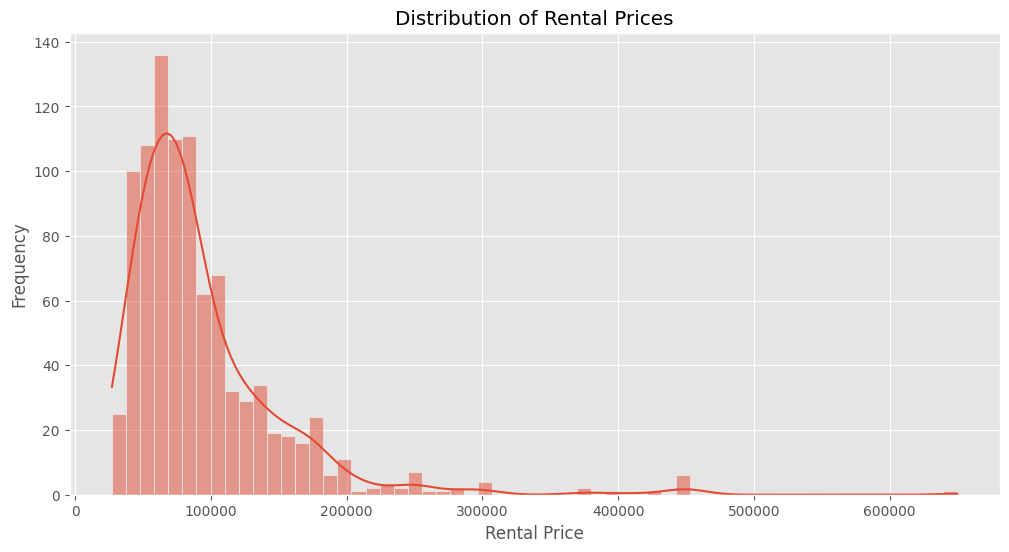

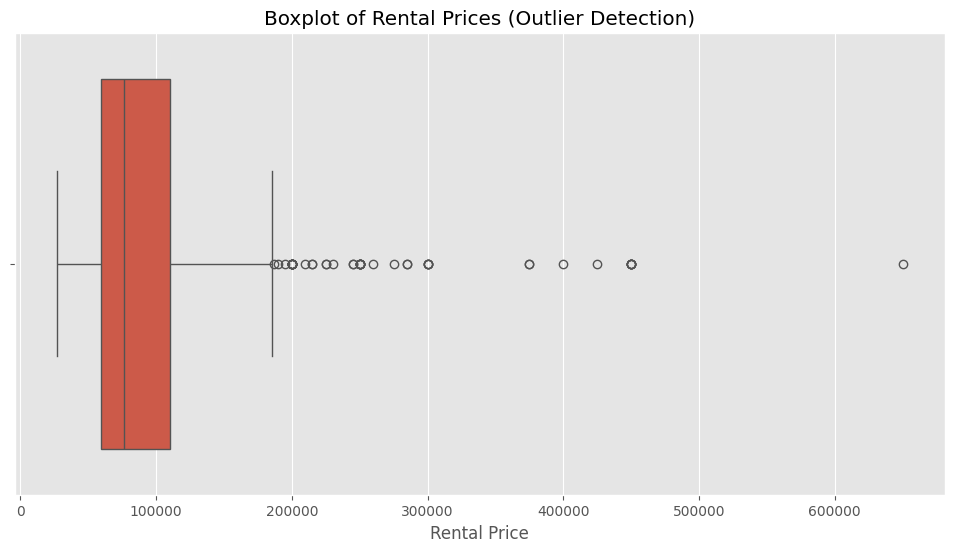

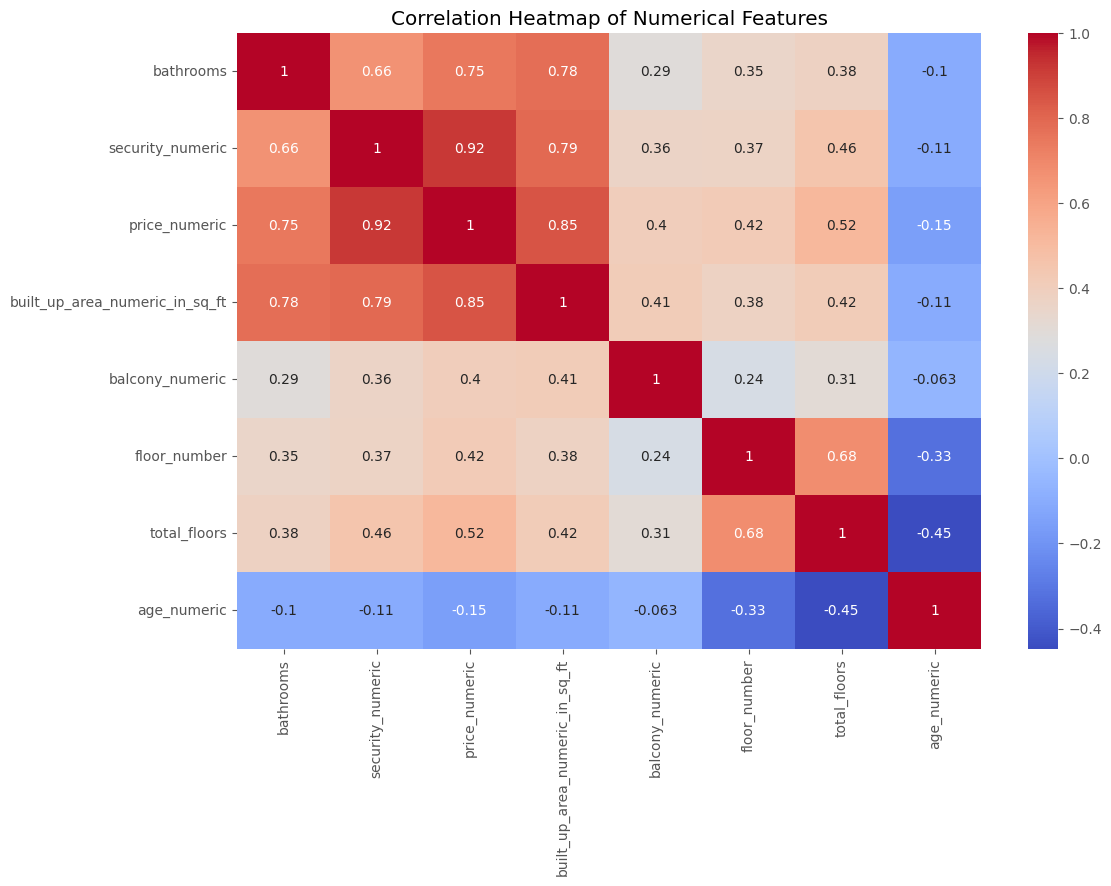

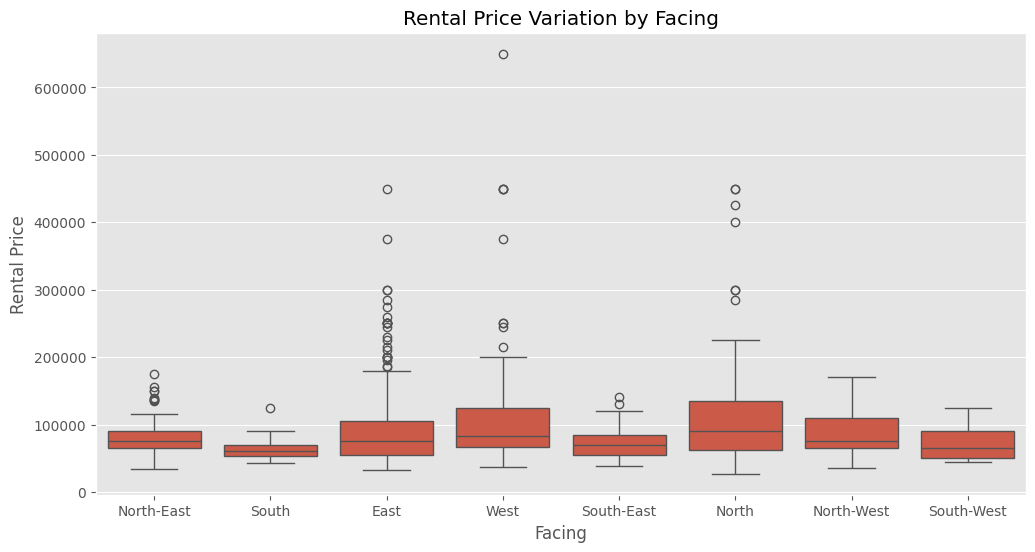

In [4]:
#performing EDA
# Set up matplotlib for visualizations
plt.style.use('ggplot')

# a. Visualize Rental Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price_numeric'], kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Rental Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price_numeric'])
plt.title('Boxplot of Rental Prices (Outlier Detection)')
plt.xlabel('Rental Price')
plt.show()

# b. Analyze Correlations
numerical_cols = ['bathrooms', 'security_numeric', 'price_numeric',
                  'built_up_area_numeric_in_sq_ft', 'balcony_numeric',
                  'floor_number', 'total_floors', 'age_numeric']

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# c. Analyze facing-wise rent variation
plt.figure(figsize=(12, 6))
sns.boxplot(x='facing', y='price_numeric', data=df)
plt.title('Rental Price Variation by Facing')
plt.xlabel('Facing')
plt.ylabel('Rental Price')
plt.show()

In [5]:
# a. Drop the unnamed column
df = df.drop(df.columns[0], axis=1)

# b. Handle duplicated columns
df = df.drop('Intercom.1', axis=1)
df = df.drop('Not Found.1', axis=1)

# c. Convert binary columns to boolean type
binary_columns = df.iloc[:, 9:].columns
for col in binary_columns:
    df[col] = df[col].astype(bool)

# d. One-hot encode categorical variables
df = pd.get_dummies(df, columns=['furnishing', 'facing'])

# e. Scale numerical features
numerical_cols = ['bathrooms', 'security_numeric', 'built_up_area_numeric_in_sq_ft', 'balcony_numeric', 'floor_number', 'total_floors', 'age_numeric']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

   bathrooms  security_numeric  price_numeric  built_up_area_numeric_in_sq_ft  \
0        0.2          0.017241          74000                        0.133428   
1        0.0          0.000000          45000                        0.018756   
2        0.2          0.068966          95000                        0.122507   
3        0.2          0.000000          48000                        0.152422   
4        0.2          0.137931          95000                        0.169041   

   balcony_numeric  floor_number  total_floors  age_numeric     AC    Bed  \
0              0.0      0.138889      0.425532          0.0  False  False   
1              1.0      0.277778      0.297872          1.0   True  False   
2              0.0      0.055556      1.000000          1.0   True   True   
3              0.0      0.083333      0.042553          1.0  False  False   
4              1.0      0.194444      0.276596          1.0  False  False   

   ...  furnishing_Semi Furnished  furnishing_Unfu

In [6]:
# a. Define features and target
X = df.drop('price_numeric', axis=1)
y = df['price_numeric']

# b. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# d. Make predictions on the test set
y_pred = model.predict(X_test)

# e. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Root Mean Squared Error (RMSE): 25509.30266356097
R-squared (R2) Score: 0.8628710555875057
